# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
### Observation
# 1.Temperature is inversely related to latitude. As latitude increases, the temperature falls, and vice versa. Generally, 
#around the world, it gets warmer towards the equator and cooler towards the poles.

#2.With the sample data we don't observe no direct impact on humidity with latitude. 

#3.In regions near equator are having lower wind than mid and high latitude area. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
#print(weather_api_key)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# set up list to hold two different temperatures


# loop throught the list of units and append them to temperatures list


City = []
Lat = []
Lng = []
MaxTemp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
CountryDate = []


for city in cities:
    
    response = requests.get(query_url + city)
    response_json = response.json()
    #pprint(response_json)
    #City.append(response['coord']['lat'])
    #response_json["name"]
    try:
        MaxTemp.append(response_json["main"]["temp_max"])
        Lat.append(response_json['coord']['lat'])
        Lng.append(response_json['coord']['lon'])
        Humidity.append(response_json['main']['humidity'])
        Cloudiness.append(response_json['clouds']['all'])
        Wind_Speed.append(response_json['wind']['speed'])
        CountryDate.append((response_json['dt']))
        City.append(city)
        print(f"{city} found!")
    except:
        # Append null values
        print("City not found")
        pass


#print(f"The city information received is: {MaxTemp}")
#print(f"The temperature information received is: {City}")

guerrero negro found!
minot found!
irtyshskiy found!
pisco found!
bintulu found!
albany found!
punta arenas found!
bethel found!
chokurdakh found!
oum hadjer found!
vardo found!
muroto found!
cape town found!
ratnagiri found!
khatanga found!
atuona found!
saldanha found!
lahaina found!
port saint john found!
jumla found!
new norfolk found!
acarau found!
xichang found!
praia da vitoria found!
wanning found!
upernavik found!
georgetown found!
severo-kurilsk found!
busselton found!
zhigansk found!
maumere found!
san carlos de bariloche found!
brovst found!
jamestown found!
victoria found!
ushuaia found!
diamantina found!
olafsvik found!
bima found!
vaini found!
oranjestad found!
port blair found!
City not found
coihaique found!
kapaa found!
kruisfontein found!
deer lake found!
bredasdorp found!
alice springs found!
mahebourg found!
clyde river found!
mataura found!
nemuro found!
souillac found!
tasiilaq found!
City not found
lebu found!
bluff found!
iqaluit found!
City not found
inverness

ConnectionError: HTTPConnectionPool(host='api.openweathermap.org', port=80): Max retries exceeded with url: /data/2.5/weather?appid=ea92e3036779ddb5a7801484ccecd75e&units=imperial&q=badou (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001EB137685B0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [4]:
# Create DataFrame
city_weather_df = pd.DataFrame({
    'City': City,
    'Lat': Lat,
    'Lng': Lng,
    'Max Temp':MaxTemp,
    'Humidity':Humidity,
    'Cloudiness':Cloudiness,
    'Wind Speed':Wind_Speed,
    'Country Date':CountryDate
    
})

city_weather_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country Date
0,huilong,31.8111,121.6550,58.93,69,3,8.23,1637926348
1,tuktoyaktuk,69.4541,-133.0374,-1.95,93,100,16.75,1637926348
2,cape town,-33.9258,18.4232,86.11,38,20,5.75,1637926181
3,horki,54.2861,30.9842,35.58,82,100,12.68,1637926348
4,pemberton,50.3164,-122.8027,42.55,98,93,5.19,1637926349
...,...,...,...,...,...,...,...,...
520,alyangula,-13.8483,136.4192,78.67,89,40,4.61,1637926498
521,kathu,7.9178,98.3332,78.62,86,97,16.24,1637926498
522,lincoln,40.8000,-96.6670,31.28,69,1,3.00,1637926494
523,kondol,52.8189,45.0580,29.21,82,14,15.64,1637926498


In [44]:
city_weather_df.to_csv("..\output_data\cities.csv",index=False)

In [5]:
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country Date
count,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,5.250000e+02
mean,21.145360,17.813069,52.985010,73.160000,60.721905,8.257333,1.637926e+09
std,33.665359,91.349864,29.733007,20.557245,37.840096,6.146239,1.293890e+02
min,-54.800000,-179.166700,-41.370000,8.000000,0.000000,0.000000,1.637926e+09
25%,-5.666700,-61.748500,32.160000,63.000000,20.000000,3.670000,1.637926e+09
50%,25.533300,21.256100,60.870000,77.000000,75.000000,6.960000,1.637926e+09
75%,49.880900,100.354300,78.780000,89.000000,97.000000,11.500000,1.637926e+09
max,78.218600,179.316700,95.520000,100.000000,100.000000,49.190000,1.637926e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
city_weather_clean_df =  city_weather_df.loc[(city_weather_df['Humidity']<=100)]
city_weather_clean_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country Date
0,huilong,31.8111,121.6550,58.93,69,3,8.23,1637926348
1,tuktoyaktuk,69.4541,-133.0374,-1.95,93,100,16.75,1637926348
2,cape town,-33.9258,18.4232,86.11,38,20,5.75,1637926181
3,horki,54.2861,30.9842,35.58,82,100,12.68,1637926348
4,pemberton,50.3164,-122.8027,42.55,98,93,5.19,1637926349
...,...,...,...,...,...,...,...,...
520,alyangula,-13.8483,136.4192,78.67,89,40,4.61,1637926498
521,kathu,7.9178,98.3332,78.62,86,97,16.24,1637926498
522,lincoln,40.8000,-96.6670,31.28,69,1,3.00,1637926494
523,kondol,52.8189,45.0580,29.21,82,14,15.64,1637926498


In [17]:
#  Get the indices of cities that have humidity over 100%.

#No city found based on humidity>100% condition


Int64Index([], dtype='int64')

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

city_weather_clean_df.describe()
# Data is already cleaned as no city has humidity more than 100%

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country Date
count,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,5.250000e+02
mean,21.145360,17.813069,52.985010,73.160000,60.721905,8.257333,1.637926e+09
std,33.665359,91.349864,29.733007,20.557245,37.840096,6.146239,1.293890e+02
min,-54.800000,-179.166700,-41.370000,8.000000,0.000000,0.000000,1.637926e+09
25%,-5.666700,-61.748500,32.160000,63.000000,20.000000,3.670000,1.637926e+09
50%,25.533300,21.256100,60.870000,77.000000,75.000000,6.960000,1.637926e+09
75%,49.880900,100.354300,78.780000,89.000000,97.000000,11.500000,1.637926e+09
max,78.218600,179.316700,95.520000,100.000000,100.000000,49.190000,1.637926e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

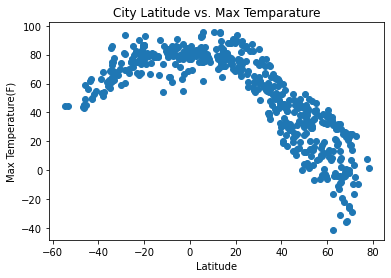

In [8]:
x_values = city_weather_clean_df['Lat']
y_values = city_weather_clean_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.title('City Latitude vs. Max Temparature')
plt.show()

## Latitude vs. Humidity Plot

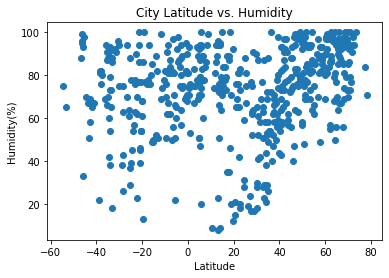

In [9]:
x_values = city_weather_clean_df['Lat']
y_values = city_weather_clean_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs. Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

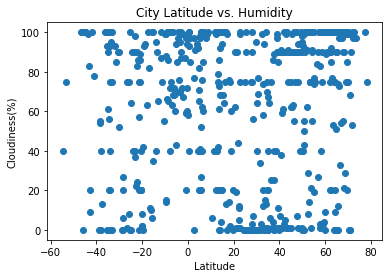

In [10]:
x_values = city_weather_clean_df['Lat']
y_values = city_weather_clean_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs. Humidity')
plt.show()

## Latitude vs. Wind Speed Plot

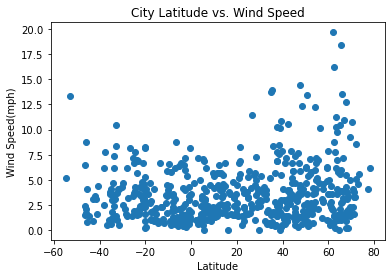

In [30]:
x_values = city_weather_clean_df['Lat']
y_values = city_weather_clean_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title('City Latitude vs. Wind Speed')
plt.show()

## Linear Regression

In [21]:
city_weather_clean_df['Lat']=pd.to_numeric(city_weather_clean_df['Lat'])

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

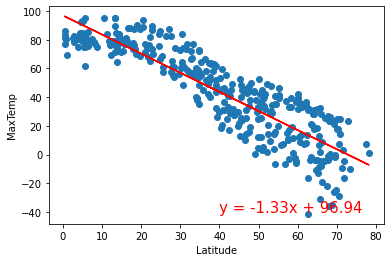

In [22]:
city_weather_NH =  city_weather_clean_df.loc[(city_weather_clean_df['Lat']>=0.000)]
x_values = city_weather_NH['Lat']
y_values = city_weather_NH['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,-40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('MaxTemp')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

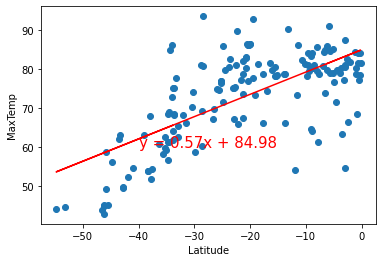

In [23]:
city_weather_SH =  city_weather_clean_df.loc[(city_weather_clean_df['Lat'])<0.00]
#city_weather_SH
x_values = city_weather_SH['Lat']
#print(x_values)

y_values = city_weather_SH['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('MaxTemp')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

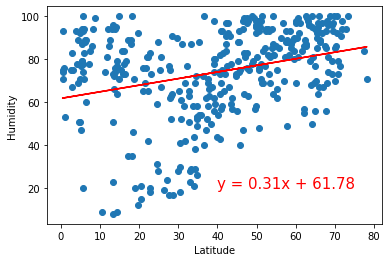

In [24]:
x_values = city_weather_NH['Lat']
y_values = city_weather_NH['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

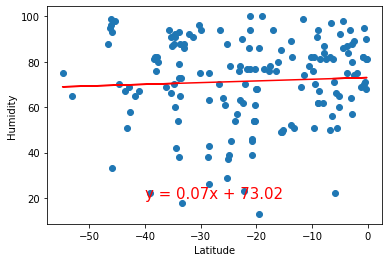

In [26]:
x_values = city_weather_SH['Lat']
#print(x_values)

y_values = city_weather_SH['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

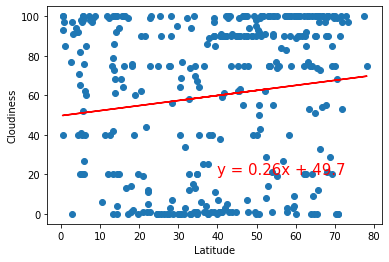

In [27]:
x_values = city_weather_NH['Lat']
y_values = city_weather_NH['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

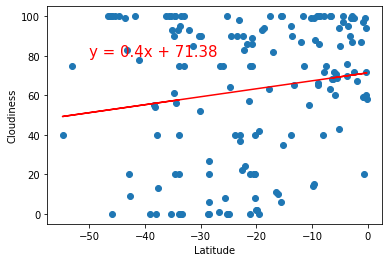

In [29]:
x_values = city_weather_SH['Lat']
#print(x_values)

y_values = city_weather_SH['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

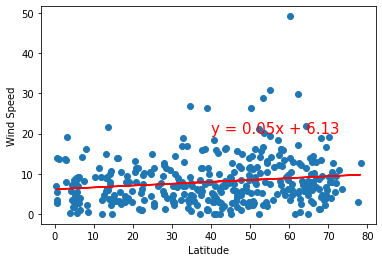

In [31]:
x_values = city_weather_NH['Lat']
y_values = city_weather_NH['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

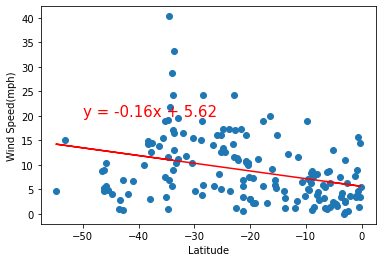

In [30]:
x_values = city_weather_SH['Lat']
#print(x_values)

y_values = city_weather_SH['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.show()